In [130]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Aditya\Downloads\data.csv", low_memory=False)
df

ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club    Value   Wage  Special  ... Composure  Marking  \
0             FC Barcelona  €110.5M  €565K     2202  ...      96.0     33.0   
1                 Juventus     €77M  €405K     2228  ...      95.0     28.0   
2      Paris Saint-Germain  €118.5M  €290K     2143  ...      94.0     27.0   
3        Manchester United     €72M  €260K     1471  ...      68.0     15.0   
4          Manchester City    €102M  €355K     2281  ...      88.0     68.0   
...                    ...      ...    ...      ...  ...       ...      ...   
18202      Crewe Alexandra     €60K    €1K     1307  ...      45.0     40.0   
18203       Trelleborgs FF     €60K    €1K     1098  ...      42.0     22.0   
18204     Cambridge United     €60K    €1K     1189  ...      41.0     32.0   
18205      Tranmere Rovers     €60K    €1K     1228  ...      46.0     20.0   
18206      Tranmere Rovers     €60K    €1K     1321  ...      43.0     40.0   

       StandingTackle  SlidingTackle GKDiving GKHandling GKKicking  \
0                28.0           26.0      6.0       11.0      15.0   
1                31.0           23.0      7.0       11.0      15.0   
2                24.0           33.0      9.0        9.0      15.0   
3                21.0           13.0     90.0       85.0      87.0   
4                58.0           51.0     15.0       13.0       5.0   
...               ...            ...      ...        ...       ...   
18202            48.0           47.0     10.0       13.0       7.0   
18203            15.0           19.0     10.0        9.0       9.0   
18204            13.0           11.0      6.0        5.0      10.0   
18205            25.0           27.0     14.0        6.0      14.0   
18206            43.0           50.0     10.0       15.0       9.0   

      GKPositioning GKReflexes Release Clause  
0              14.0        8.0        €226.5M  
1              14.0       11.0        €127.1M  
2              15.0       11.0        €228.1M  
3              88.0       94.0        €138.6M  
4              10.0       13.0        €196.4M  
...             ...        ...            ...  
18202           8.0        9.0          €143K  
18203           5.0       12.0          €113K  
18204           6.0       13.0          €165K  
18205           8.0        9.0          €143K  
18206          12.0        9.0          €165K  

[18207 rows x 84 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [4]:
df.describe()

ID           Age       Overall     Potential       Special  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299   1597.809908   
std     29965.244204      4.669943      6.908930      6.136496    272.586016   
min        16.000000     16.000000     46.000000     48.000000    731.000000   
25%    200315.500000     21.000000     62.000000     67.000000   1457.000000   
50%    221759.000000     25.000000     66.000000     71.000000   1635.000000   
75%    236529.500000     28.000000     71.000000     75.000000   1787.000000   
max    246620.000000     45.000000     94.000000     95.000000   2346.000000   

       International Reputation     Weak Foot   Skill Moves      Crossing  \
count              18159.000000  18159.000000  18159.000000  18159.000000   
mean                   1.113222      2.947299      2.361308     49.734181   
std                    0.394031      0.660456      0.756164     18.364524   
min                    1.000000      1.000000      1.000000      5.000000   
25%                    1.000000      3.000000      2.000000     38.000000   
50%                    1.000000      3.000000      2.000000     54.000000   
75%                    1.000000      3.000000      3.000000     64.000000   
max                    5.000000      5.000000      5.000000     93.000000   

          Finishing  ...     Penalties     Composure       Marking  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      45.550911  ...     48.548598     58.648274     47.281623   
std       19.525820  ...     15.704053     11.436133     19.904397   
min        2.000000  ...      5.000000      3.000000      3.000000   
25%       30.000000  ...     39.000000     51.000000     30.000000   
50%       49.000000  ...     49.000000     60.000000     53.000000   
75%       62.000000  ...     60.000000     67.000000     64.000000   
max       95.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 42 columns]

In [5]:
# DATA CLEANING

In [6]:
# There are few variables in the dataset which do not need for analysis, so we drop those columns

df.drop(['ID','Real Face','Loaned From'], axis=1,inplace=True)

In [7]:
# We fill all the numerical variable which as NA values with their mean value.

df['International Reputation'].fillna(df['International Reputation'].mean(), inplace = True) 
df['Skill Moves'].fillna(df['Skill Moves'].mean(), inplace = True)
df['Weak Foot'].fillna(df['Weak Foot'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True) 
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace = True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace = True)
df['Agility'].fillna(df['Agility'].mean(), inplace = True)
df['Reactions'].fillna(df['Reactions'].mean(), inplace = True)
df['Balance'].fillna(df['Balance'].mean(), inplace = True)
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace = True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace = True)
df['Stamina'].fillna(df['Stamina'].mean(), inplace = True)
df['Strength'].fillna(df['Strength'].mean(), inplace = True)
df['LongShots'].fillna(df['LongShots'].mean(), inplace = True)
df['Aggression'].fillna(df['Aggression'].mean(), inplace = True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace = True)
df['Positioning'].fillna(df['Positioning'].mean(), inplace = True)
df['Vision'].fillna(df['Vision'].mean(), inplace = True)
df['Penalties'].fillna(df['Penalties'].mean(), inplace = True)
df['Composure'].fillna(df['Composure'].mean(), inplace = True)
df['Marking'].fillna(df['Marking'].mean(), inplace = True)
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace = True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace = True)
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace = True)
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace = True)
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace = True)
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace = True)
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace = True)

In [8]:
# Filling NA values in Club variable with "No Club"

df['Club'].fillna('No Club', inplace = True)

In [9]:
# Filling NA values in Position variable with "Unknown"

df['Position'].fillna('Unknown',inplace=True)

In [10]:
# 'Work Rate' Variable  

df['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [11]:
# We fill the NA values in the 'Work Rate' variable with most occured value which is 'Medium/ Medium'

df['Work Rate'].fillna('Medium/ Medium', inplace = True)

In [12]:
# 'Preferred Foot' variable

df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [13]:
# Similarly, we fill the NA values in the 'Preferred Foot' variable with most occured value which is 'Right'

df['Preferred Foot'].fillna('Right', inplace = True)

In [14]:
# 'Body Type' Variable 

df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body Type, dtype: int64

In [15]:
# Similarly, we fill the NA values in the 'Body Type' variable with most occured value which is 'Normal'

df['Body Type'][df['Body Type'] == 'Messi'] = 'Normal'
df['Body Type'][df['Body Type'] == 'C. Ronaldo'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Neymar'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Courtois'] = 'Normal'
df['Body Type'][df['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Shaqiri'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Akinfenwa'] = 'Normal'

# Also repalcing NA values with 'Normal'

df['Body Type'].fillna('Normal', inplace = True)

In [16]:
# In 'Joined' Variable we eliminate the data, month and convert the variable into string type  

def clean_date(x):
    l=[]
    if isinstance(x,str):
        l=x.split(", ")
        x=l[-1]
    return(x)

df['Joined']=df['Joined'].replace(np.nan,0)
df['Joined'] = df['Joined'].apply(clean_date).astype('str')

In [17]:
# Converting 'Contract Valid Until' variable from string type to data format

import datetime
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

# Replacing NA values with Not available 

df['Contract Valid Until'].fillna('Not available', inplace = True) 

In [18]:
# Converting 'Heigth' variable into proper decimal point for the visualization use

def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])54
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)

df['Height'] = df['Height'].apply(clean_height)

# Replacing the NA values with the mean height

df['Height'].fillna((df['Height'].mean()), inplace = True)

In [19]:
# In 'Weight' variable we remove the lbs in the values and convert it into float data type 

def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

df['Weight'] = df['Weight'].apply(clean_weight).astype('float')

# Replacing the NA values with the mean value 
df['Weight'].fillna((df['Weight'].mean()), inplace = True) 

In [20]:
# we add all the value(for eg. 88+2) in the column 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'

# Writing function which add the values in all the above columns

def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

for col in skill_columns:
    df[col] = df[col].apply(skillConverter)
    df[col].fillna(0.0, inplace = True)

In [21]:
# We convert the data in "Values, Wages and Release Claues" varibale in numeric, (for eg €50M to 50000000)

def currency_to_numeric(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)
    
df['Value'] = df['Value'].apply(lambda x: currency_to_numeric(x))
df['Wage'] = df['Wage'].apply(lambda x: currency_to_numeric(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: currency_to_numeric(x))

# Replacing NA values in the 'Release Clause' variable with its mean values  

df['Release Clause'].fillna(df['Release Clause'].mean(), inplace = True)

In [22]:
df

Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                      Club        Value      Wage  Special Preferred Foot  \
0             FC Barcelona  110500000.0  565000.0     2202           Left   
1                 Juventus   77000000.0  405000.0     2228          Right   
2      Paris Saint-Germain  118500000.0  290000.0     2143          Right   
3        Manchester United   72000000.0  260000.0     1471          Right   
4          Manchester City  102000000.0  355000.0     2281          Right   
...                    ...          ...       ...      ...            ...   
18202      Crewe Alexandra      60000.0    1000.0     1307          Right   
18203       Trelleborgs FF      60000.0    1000.0     1098          Right   
18204     Cambridge United      60000.0    1000.0     1189          Right   
18205      Tranmere Rovers      60000.0    1000.0     1228          Right   
18206      Tranmere Rovers      60000.0    1000.0     1321          Right   

       ...  Composure  Marking  StandingTackle SlidingTackle GKDiving  \
0      ...       96.0     33.0            28.0          26.0      6.0   
1      ...       95.0     28.0            31.0          23.0      7.0   
2      ...       94.0     27.0            24.0          33.0      9.0   
3      ...       68.0     15.0            21.0          13.0     90.0   
4      ...       88.0     68.0            58.0          51.0     15.0   
...    ...        ...      ...             ...           ...      ...   
18202  ...       45.0     40.0            48.0          47.0     10.0   
18203  ...       42.0     22.0            15.0          19.0     10.0   
18204  ...       41.0     32.0            13.0          11.0      6.0   
18205  ...       46.0     20.0            25.0          27.0     14.0   
18206  ...       43.0     40.0            43.0          50.0     10.0   

      GKHandling GKKicking GKPositioning  GKReflexes  Release Clause  
0           11.0      15.0          14.0         8.0     226500000.0  
1           11.0      15.0          14.0        11.0     127100000.0  
2            9.0      15.0          15.0        11.0     228100000.0  
3           85.0      87.0          88.0        94.0     138600000.0  
4           13.0       5.0          10.0        13.0     196400000.0  
...          ...       ...           ...         ...             ...  
18202       13.0       7.0           8.0         9.0        143000.0  
18203        9.0       9.0           5.0        12.0        113000.0  
18204        5.0      10.0           6.0        13.0        165000.0  
18205        6.0      14.0           8.0         9.0        143000.0  
18206       15.0       9.0          12.0         9.0        165000.0  

[18207 rows x 81 columns]

In [23]:
# DATA VISUALIZATION

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      18207 non-null  object 
 6   Value                     18207 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Weak Foot                 18207 non-null  float64
 12  Skill Moves               18207 non-null  float64
 13  Work Rate                 18207 non-null  object 
 14  Body T

In [25]:
# Number of Players by Age

In [26]:
df['Age'].value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
45       1
42       1
Name: Age, dtype: int64

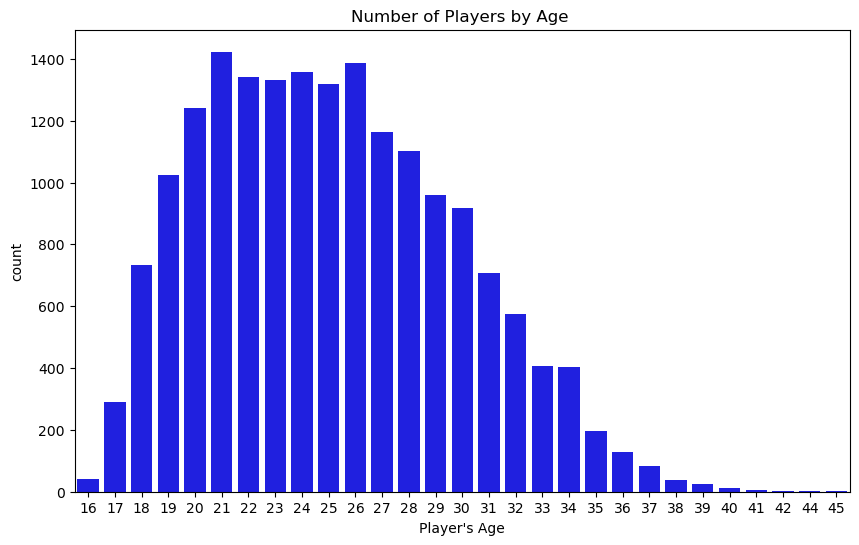

In [27]:
#   

age = df['Age']
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Age', color='blue')
ax.set_xlabel(xlabel = "Player's Age")
ax.set_title(label = "Number of Players by Age ")
plt.show()

In [28]:
# Distribution of Age By Potential and Overall Rating

In [29]:
# Grouping the "overall" & "potential" variable by "Age"
overall = pd.DataFrame(df.groupby(["Age"])['Overall'].mean())
potential = pd.DataFrame(df.groupby(["Age"])['Potential'].mean())

In [30]:
# 
merged = pd.merge(overall, potential, on='Age', how='inner')
merged['Age']= merged.index

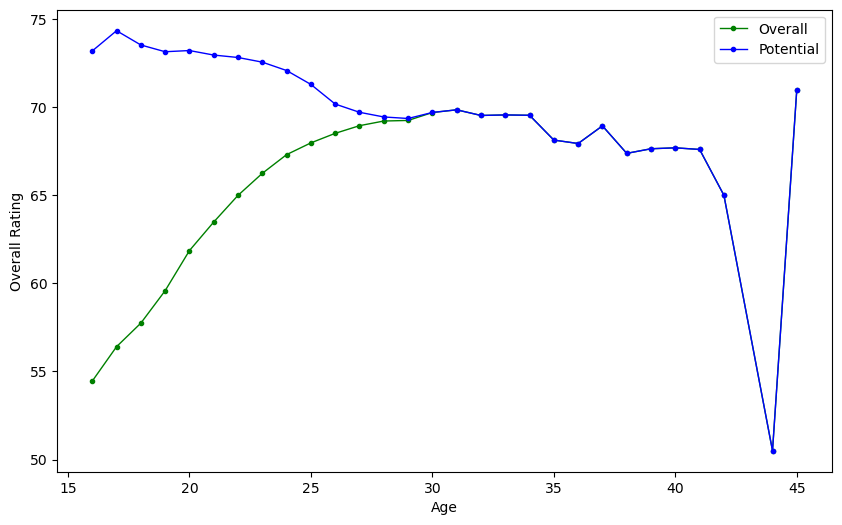

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
merged.reset_index(drop = True, inplace = True)

plt.plot('Age', 'Overall', data=merged, marker='.', color='green', lw=1, label ="Overall" )
plt.plot('Age', 'Potential', data=merged, marker='.', color='blue', lw=1, label = "Potential")
plt.ylabel('Overall Rating')
plt.xlabel('Age')
plt.legend();

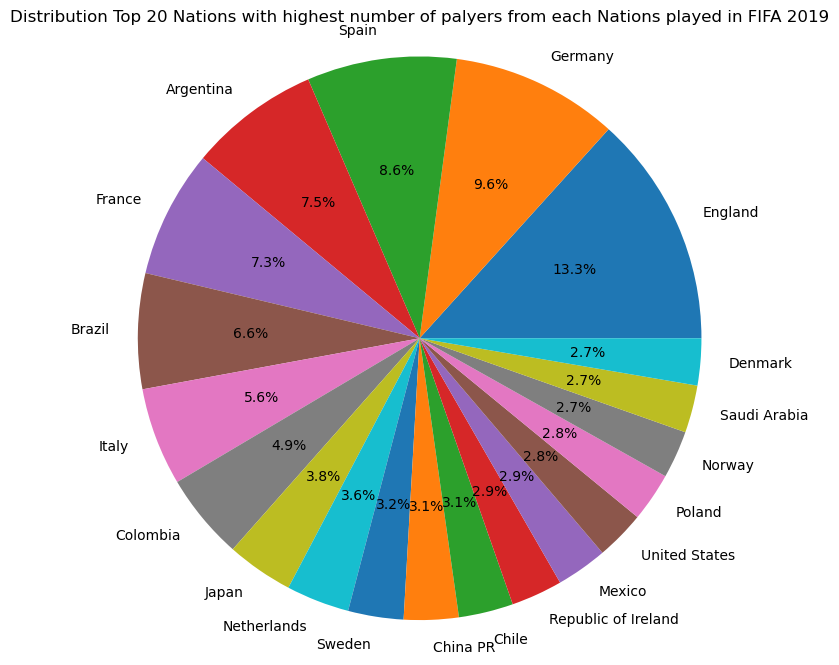

In [32]:
# Number of players from Top 20 nations played FIFA 2019

nationality_counts = df['Nationality'].value_counts().head(20)

# Plotting pie chart
plt.figure(figsize=(8,8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Distribution Top 20 Nations with highest number of palyers from each Nations played in FIFA 2019')
plt.show()

In [33]:
# Numbers of players in each position

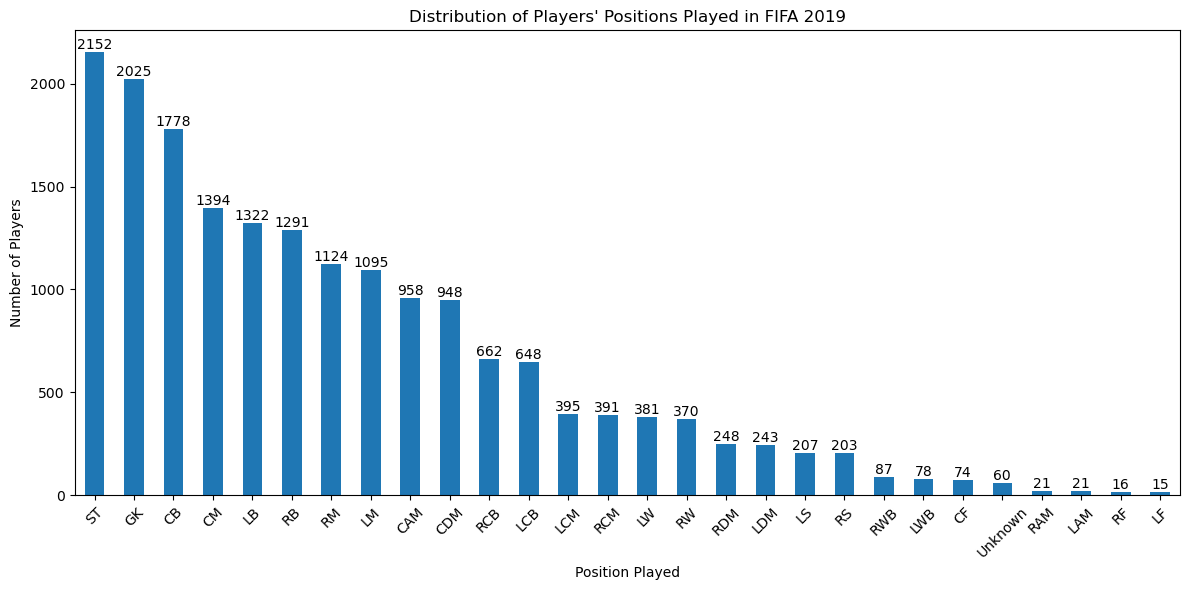

In [34]:
# Calculate the counts of each position played
position_counts = df['Position'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar')
plt.xlabel('Position Played')
plt.ylabel('Number of Players')
plt.title('Distribution of Players\' Positions Played in FIFA 2019')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, count in enumerate(position_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [35]:
# Top 20 teams with highest player's average value

In [36]:
club = df.groupby('Club')['Value'].mean().reset_index().sort_values('Value', ascending=True).tail(20)
fig = px.bar(club, x="Value", y="Club", orientation='h')
fig.show()

In [37]:
# Top 20 teams with highest player's average Overall rating

In [38]:
club = df.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(20)
fig = px.bar(club, x="Overall", y="Club", orientation='h')
fig.show()

In [39]:
# Top Features for every Playing Position

In [40]:
# 
player_features = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

df_postion  = pd.DataFrame()
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_postion[position_name] = tuple(top_features)
df_postion.head()

CAM               CB           CDM            CF            CM  \
0       Balance         Strength       Stamina       Agility       Balance   
1       Agility          Jumping    Aggression       Balance  ShortPassing   
2  Acceleration   StandingTackle      Strength  Acceleration       Agility   
3   SprintSpeed       Aggression  ShortPassing   SprintSpeed       Stamina   
4   BallControl  HeadingAccuracy       Jumping     Dribbling  Acceleration   

              GK           LAM            LB              LCB           LCM  \
0     GKReflexes       Agility   SprintSpeed         Strength       Stamina   
1       GKDiving       Balance  Acceleration          Jumping  ShortPassing   
2  GKPositioning   SprintSpeed       Stamina   StandingTackle       Balance   
3     GKHandling  Acceleration       Balance       Aggression       Agility   
4      GKKicking     Dribbling       Agility  HeadingAccuracy   BallControl   

   ...              RCB           RCM           RDM            RF  \
0  ...         Strength       Stamina       Stamina       Agility   
1  ...          Jumping  ShortPassing  ShortPassing  Acceleration   
2  ...       Aggression       Agility    Aggression       Balance   
3  ...   StandingTackle       Balance      Strength   BallControl   
4  ...  HeadingAccuracy   BallControl       Jumping   SprintSpeed   

             RM            RS            RW           RWB            ST  \
0  Acceleration   SprintSpeed  Acceleration   SprintSpeed   SprintSpeed   
1   SprintSpeed      Strength   SprintSpeed  Acceleration      Strength   
2       Agility  Acceleration       Agility       Stamina  Acceleration   
3       Balance       Agility       Balance       Agility       Jumping   
4     Dribbling     ShotPower     Dribbling       Balance     Finishing   

        Unknown  
0  Acceleration  
1   SprintSpeed  
2       Balance  
3       Jumping  
4       Agility  

[5 rows x 28 columns]

In [41]:
# Building best Team with best player at each position 

In [42]:
# Player with max value according to their features at each position 

position = []
player = []
club_l = []
for col in df_postion.columns:
    tmp_df = pd.DataFrame()
    l = [df_postion[col].values]
    l = l[0]
    l = list(l)
    l.append('Name')
    tmp_df = pd.DataFrame.copy(df[df['Position'] == col][l])
    tmp_df['mean'] = np.mean(tmp_df.iloc[: , :-1] , axis = 1)
    name = tmp_df['Name'][tmp_df['mean'] == tmp_df['mean'].max()].values[0]
    club = df['Club'][df['Name'] == str(name)].values[0]
    position.append(col)
    player.append(name)
    club_l.append(club)

In [43]:
# Simpilying all the position for better understanding 
gk = ['GK']
forward = ['LS', 'ST', 'RS','LF', 'CF', 'RF']
midfeilder = ['LW','RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
              'RCM', 'RM', 'LDM', 'CDM', 'RDM' ]
defenders = ['LWB','RWB', 'LB', 'LCB', 'CB',]

In [44]:
# Find the top playes in each positions

print('GoalKeeper : ')
for p , n , c in zip(position , player , club_l):
    if p in gk:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nFORWARD : ')
for p , n , c in zip(position , player , club_l):
    if p in forward:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nMIDFEILDER : ')
for p , n , c in zip(position , player , club_l):
    if p in midfeilder:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nDEFENDER : ')
for p , n , c in zip(position , player , club_l):
    if p in defenders:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))

GoalKeeper : 
De Gea [Club : Manchester United , Position : GK]

FORWARD : 
S. Giovinco [Club : Toronto FC , Position : CF]
E. Hazard [Club : Chelsea , Position : LF]
J. Martínez [Club : Atlanta United , Position : LS]
L. Messi [Club : FC Barcelona , Position : RF]
A. Saint-Maximin [Club : OGC Nice , Position : RS]
Cristiano Ronaldo [Club : Juventus , Position : ST]

MIDFEILDER : 
H. Nakagawa [Club : Kashiwa Reysol , Position : CAM]
Casemiro [Club : Real Madrid , Position : CDM]
N. Keïta [Club : Liverpool , Position : CM]
Paulo Daineiro [Club : Ceará Sporting Club , Position : LAM]
David Silva [Club : Manchester City , Position : LCM]
N. Kanté [Club : Chelsea , Position : LDM]
Douglas Costa [Club : Juventus , Position : LM]
Neymar Jr [Club : Paris Saint-Germain , Position : LW]
J. Cuadrado [Club : Juventus , Position : RAM]
L. Modrić [Club : Real Madrid , Position : RCM]
P. Pogba [Club : Manchester United , Position : RDM]
Gelson Martins [Club : Atlético Madrid , Position : RM]
R. Ster

In [45]:
# we assign top player's name to their respective postitons

CAM = 'H. Nakagawa'
CB = 'D. Godín'
CDM = 'Casemiro'
CF = 'S. Giovinco'
CM = 'N. Keïta'
GK = 'De Gea'
LAM = 'Paulo Daineiro'
LB = 'Jordi Alba'
LCB = 'G. Chiellini'
LCM = 'David Silva'
LDM = 'N. Kanté' 
LF = 'E. Hazard' 
LM = 'Douglas Costa' 
LS = 'J. Martínez' 
LW = 'Neymar Jr' 
LWB = 'M. Pedersen' 
RAM = 'J. Cuadrado' 
RB = 'Nélson Semedo' 
RCB = 'Sergio Ramos' 
RCM = 'L. Modrić' 
RDM = 'P. Pogba' 
RF = 'L. Messi' 
RM = 'Gelson Martins' 
RS = 'A. Saint-Maximin' 
RW = 'R. Sterling' 
RWB = 'M. Millar' 
ST = 'Cristiano Ronaldo'

In [46]:
def create_football_formation(formation = [] , label_1 = None ,
                              label_2 = None , label_3 = None ,
                              label_4 = None, label_4W = None ,
                              label_5 = None , label_3W = None):
    
    plt.scatter(x = [1] , y = [6] , s = 300 , color = 'red')
    plt.annotate('De Gea \n(Manchester United)' , (1 - 0.5 , 6 + 0.5))
    plt.plot(np.ones((11 , ))*1.5 , np.arange(1 , 12) , 'w-')
    plt.plot(np.ones((5 , ))*0.5 , np.arange(4 , 9) , 'w-')
    
    n = 0
    for posi in formation:
        if posi ==  1:
            n += 3
            plt.scatter(x = [n]  , y = [6] , s = 300 , color = 'red')
            for i, txt in enumerate(label_1):
                txt = str(txt+'\n('+ df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, ( n-0.5 , 6+0.5))
            
        elif posi == 2:
            n += 3
            y = [5 , 7.5]
            x = [ n , n ]
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_2):
                txt = str(txt+'\n('+ df['Club'][df['Name'] == txt].values[0]+')') 
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
        
        elif posi == 3:
            n+=3
            y = [3.333 , 6.666 , 9.999]
            x = [n , n  , n ]
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_3):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
            if not label_3W == None:
                n+=3
                y = [3.333 , 6.666 , 9.999]
                x = [n , n  , n ] 
                plt.scatter(x  , y , s = 300 , color = 'red')
                for i, txt in enumerate(label_3W):
                    txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                    plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
        elif posi == 4 and not label_4 == None:
            n+=3
            y = [2.5 , 5 , 7.5 , 10]
            x = [n , n  , n , n ]         
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_4):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))  
            if not label_4W == None:
                n+=3
                y = [2.5 , 5 , 7.5 , 10]
                x = [n , n  , n , n ]
                plt.scatter(x  , y , s = 300 , color = 'red')
                for i, txt in enumerate(label_4W):
                    txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                    plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
                
                
        elif posi == 5:
            n+=3
            y = [2 , 4 , 6 , 8 , 10]
            x = [n , n , n  , n  , n]
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_5):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
    plt.plot(np.ones((5 , ))*(n+0.5) , np.arange(4 , 9) , 'w-')
    plt.plot(np.ones((11 , ))*(n/2) , np.arange(1 , 12) , 'w-')
    plt.yticks([])
    plt.xticks([])
    ax = plt.gca()
    ax.set_facecolor('#28fc03')            

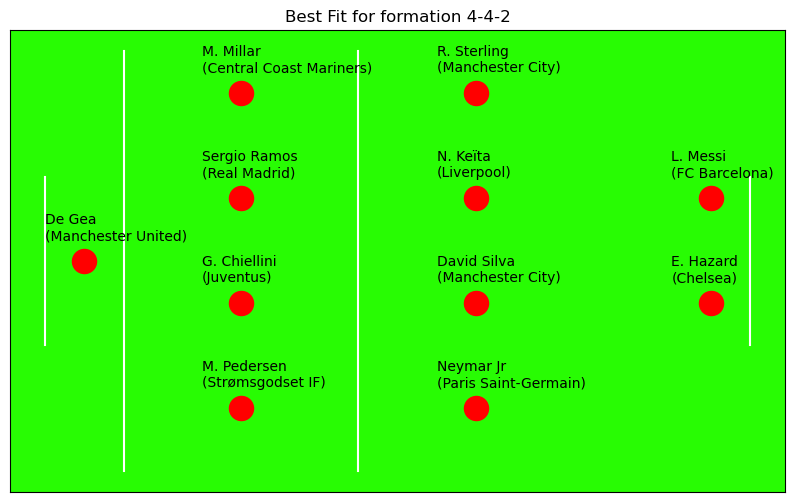

In [47]:
# 
plt.figure(1 , figsize = (10 , 6))           
create_football_formation(formation = [ 4 ,2] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_4W = [LW , LCM , CM , RW],
                         label_2 = [LF , RF],
                         )
plt.title('Best Fit for formation 4-4-2')
plt.show()

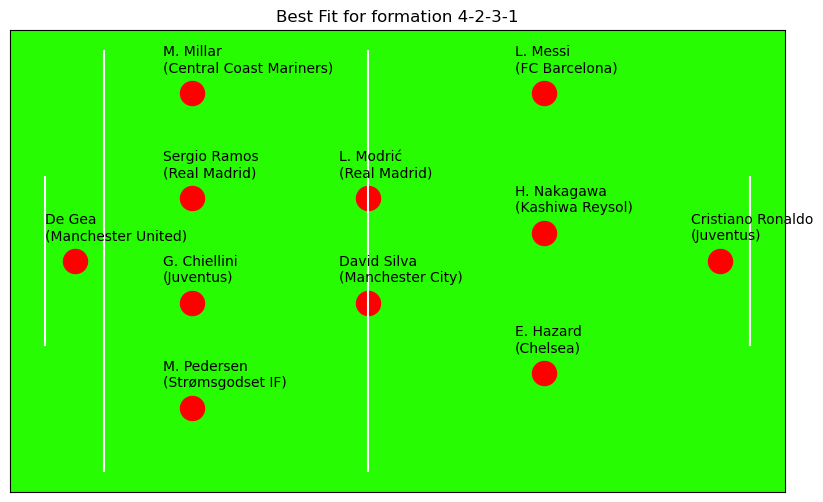

In [48]:
# 
plt.figure(1 , figsize = (10 , 6))           
create_football_formation(formation = [ 4 , 2 , 3 , 1] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_2 = [LCM , RCM],
                         label_3 = [LF , CAM , RF],
                         label_1 = [ST])
plt.title('Best Fit for formation 4-2-3-1')
plt.show()

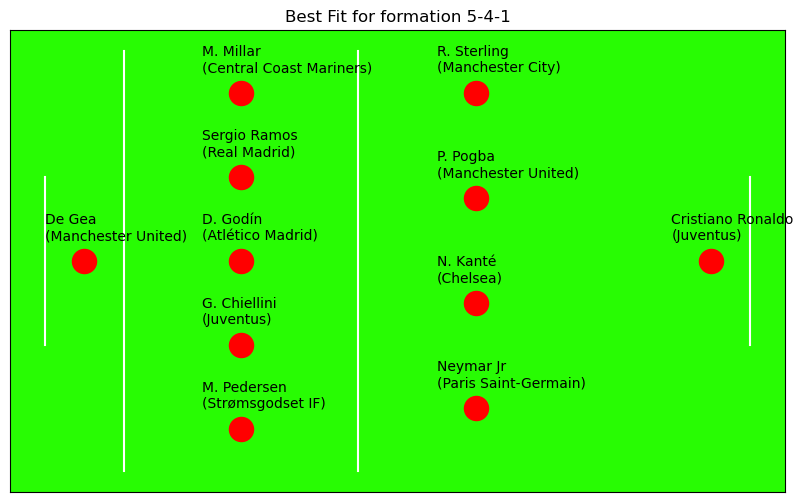

In [49]:
#
plt.figure(1 , figsize = (10 , 6))           
create_football_formation(formation = [ 5, 4 , 1 ] , 
                         label_5 = [LWB , LCB , CB , RCB , RWB],
                         label_4 = [LW, LDM , RDM , RW],
                         label_1 = [ST])
plt.title('Best Fit for formation 5-4-1')
plt.show()

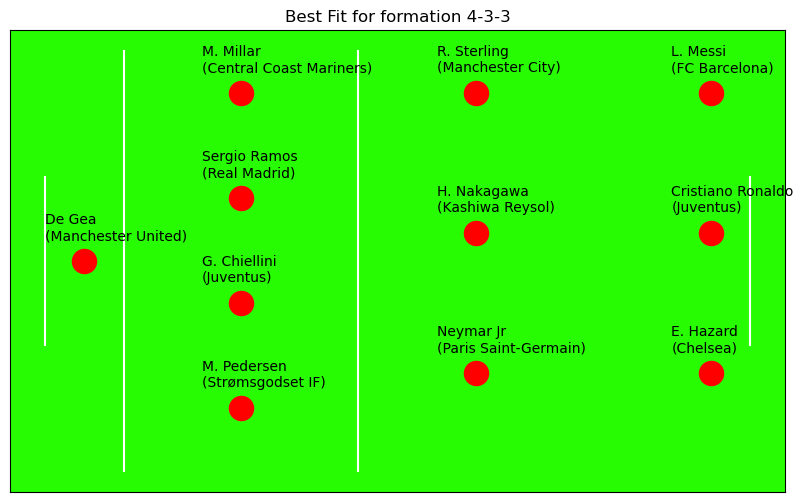

In [50]:
#
plt.figure(1 , figsize = (10 , 6))           
create_football_formation(formation = [ 4 , 3 ] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_3 = [LW, CAM , RW],
                         label_3W = [LF , ST , RF])
plt.title('Best Fit for formation 4-3-3')
plt.show()

In [51]:
# Feature Engineering

In [52]:
# Countrys with over 250 Players i.e. Major Playing Nations

nat_counts = df["Nationality"].value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

# Replace Nationality with a binary indicator variable for 'Major Nation'

def major_nation(df1):
    if (df1["Nationality"] in nat_list):
        return 1
    else:
        return 0
    
df['Major_Nation'] = df.apply(major_nation,axis = 1)

In [53]:
# Converting Preferred Foot into a binary indicator variable

def right_footed(df1):
    if (df1['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0
df['Right_Foot'] = df.apply(right_footed, axis=1)

In [54]:
# Create a simplified position variable

def simple_position(df1):
    if (df1['Position'] == 'GK'):
        return 'GK'
    elif ((df1['Position'] == 'RB') | (df1['Position'] == 'LB') | (df1['Position'] == 'CB') | (df1['Position'] == 'LCB') | (df1['Position'] == 'RCB') | (df1['Position'] == 'RWB') | (df1['Position'] == 'LWB')):
        return 'DF'
    elif ((df1['Position'] == 'LDM') | (df1['Position'] == 'CDM') | (df1['Position'] == 'RDM')):
        return 'DM'
    elif ((df1['Position'] == 'LM') | (df1['Position'] == 'LCM') | (df1['Position'] == 'CM') | (df1['Position'] == 'RCM') | (df1['Position'] == 'RM')):
        return 'MF'
    elif ((df1['Position'] == 'LAM') | (df1['Position'] == 'CAM') | (df1['Position'] == 'RAM') | (df1['Position'] == 'LW') | (df1['Position'] == 'RW')):
        return 'AM'
    elif ((df1['Position'] == 'RS') | (df1['Position'] == 'ST') | (df1['Position'] == 'LS') | (df1['Position'] == 'CF') | (df1['Position'] == 'LF') | (df1['Position'] == 'RF')):
        return 'ST'
    else:
        return df1['Position']

# Apply the simplified position function to create a new column
df['Simple_Position'] = df.apply(simple_position, axis=1)

In [55]:
#Split the Work Rate Column in two
tempwork = df["Work Rate"].str.split("/ ", n = 1, expand = True) 

#Create new column for first work rate
df["WorkRate1"]= tempwork[0]   

#Create new column for second work rate
df["WorkRate2"]= tempwork[1]

In [56]:
# Drop all column which are categorical variable 
df.drop(['Name','Nationality','Club','Wage','Preferred Foot','Work Rate','Position','Joined','Contract Valid Until','Release Clause'],axis=1,inplace=True)

In [57]:
df.head()

Age  Overall  Potential        Value  Special  International Reputation  \
0   31       94         94  110500000.0     2202                       5.0   
1   33       94         94   77000000.0     2228                       5.0   
2   26       92         93  118500000.0     2143                       5.0   
3   27       91         93   72000000.0     1471                       4.0   
4   27       91         92  102000000.0     2281                       4.0   

   Weak Foot  Skill Moves Body Type    Height  ...  GKDiving  GKHandling  \
0        4.0          4.0    Normal  5.583333  ...       6.0        11.0   
1        4.0          5.0    Normal  6.166667  ...       7.0        11.0   
2        5.0          5.0    Normal  5.750000  ...       9.0         9.0   
3        3.0          1.0      Lean  6.333333  ...      90.0        85.0   
4        5.0          4.0    Normal  5.916667  ...      15.0        13.0   

   GKKicking  GKPositioning  GKReflexes  Major_Nation  Right_Foot  \
0       15.0           14.0         8.0             1           0   
1       15.0           14.0        11.0             1           1   
2       15.0           15.0        11.0             1           1   
3       87.0           88.0        94.0             1           1   
4        5.0           10.0        13.0             1           1   

   Simple_Position  WorkRate1  WorkRate2  
0               ST     Medium     Medium  
1               ST       High        Low  
2               AM       High     Medium  
3               GK     Medium     Medium  
4               MF       High       High  

[5 rows x 76 columns]

In [58]:
# Converting Categorical to Numerical columns

In [59]:
df['Body Type'].unique()

array(['Normal', 'Lean', 'Stocky'], dtype=object)

In [60]:
# converting 'Lean' = 1, 'Normal' = 2 & 'Stocky' = 3
body_type= {
    'Lean':0,
    'Normal':1,
    'Stocky':2
}
df['Body Type'] = df['Body Type'].map(body_type)

In [61]:
df['Simple_Position'].unique()

array(['ST', 'AM', 'GK', 'MF', 'DF', 'DM', 'Unknown'], dtype=object)

In [62]:
# Converting simple_postion to numeric values

simple_position = {
    'ST':0,
    'AM':1,
    'GK':2,
    'MF':3,
    'DF':4,
    'DM':5,
    'unknown':6
}
df['Simple_Position'] = df['Simple_Position'].map(simple_position)

In [63]:
df['WorkRate1'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [64]:
df['WorkRate2'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [66]:
work_rate ={
    'Low':1,
    'Medium':2,
    'High':3,
    
}
df['WorkRate1'] = df['WorkRate1'].map(work_rate)
df['WorkRate2'] = df['WorkRate2'].map(work_rate)

In [67]:
#dropping the converted columns
df.drop(['Body Type','Simple_Position', 'WorkRate1','WorkRate2'],axis=1, inplace=True)

In [68]:
df.head()

Age  Overall  Potential        Value  Special  International Reputation  \
0   31       94         94  110500000.0     2202                       5.0   
1   33       94         94   77000000.0     2228                       5.0   
2   26       92         93  118500000.0     2143                       5.0   
3   27       91         93   72000000.0     1471                       4.0   
4   27       91         92  102000000.0     2281                       4.0   

   Weak Foot  Skill Moves    Height  Weight  ...  Marking  StandingTackle  \
0        4.0          4.0  5.583333   159.0  ...     33.0            28.0   
1        4.0          5.0  6.166667   183.0  ...     28.0            31.0   
2        5.0          5.0  5.750000   150.0  ...     27.0            24.0   
3        3.0          1.0  6.333333   168.0  ...     15.0            21.0   
4        5.0          4.0  5.916667   154.0  ...     68.0            58.0   

   SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
0           26.0       6.0        11.0       15.0           14.0         8.0   
1           23.0       7.0        11.0       15.0           14.0        11.0   
2           33.0       9.0         9.0       15.0           15.0        11.0   
3           13.0      90.0        85.0       87.0           88.0        94.0   
4           51.0      15.0        13.0        5.0           10.0        13.0   

   Major_Nation  Right_Foot  
0             1           0  
1             1           1  
2             1           1  
3             1           1  
4             1           1  

[5 rows x 72 columns]

In [69]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Major_Nation',
       'Right_Foot'],
      dtype='object')

In [70]:
# we load all the variable in 'X' excluding our Target variable 'Values' and all the position variable which are irrelevent.

X = df[['Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 
        'Crossing', 'Finishing','HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
        'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 
        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 
        'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 
        'GKPositioning', 'GKReflexes', 'Major_Nation','Right_Foot']]

In [87]:
# We load our target variable in y
y = df['Value']

In [ ]:
# Correlation Matrix

In [96]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

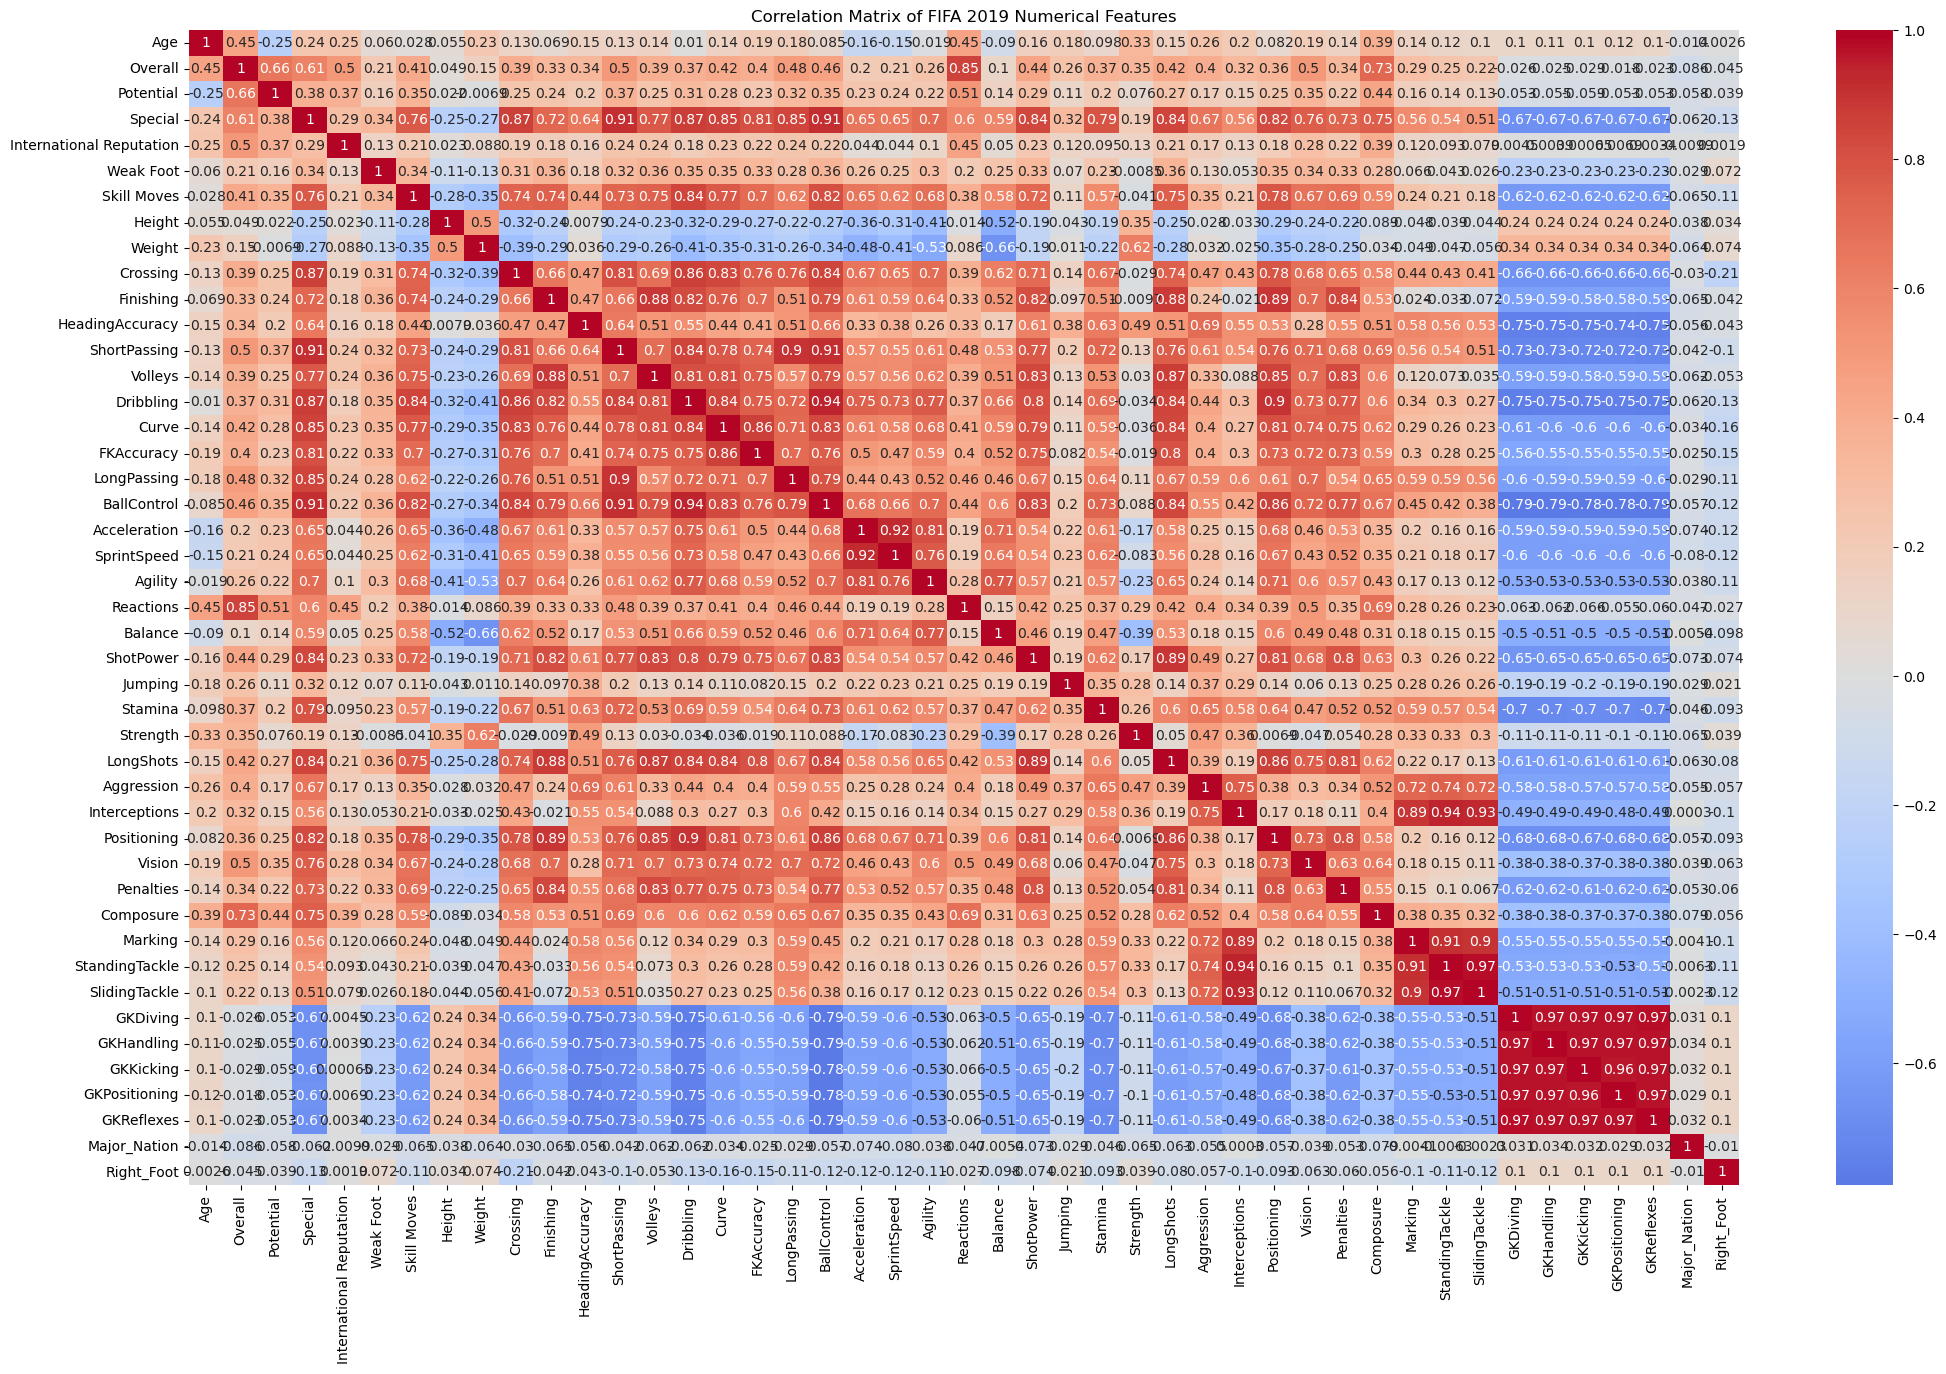

In [97]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of FIFA 2019 Numerical Features")
plt.show()

In [ ]:
# PCA

In [98]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
# Apply PCA
n_components = 10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

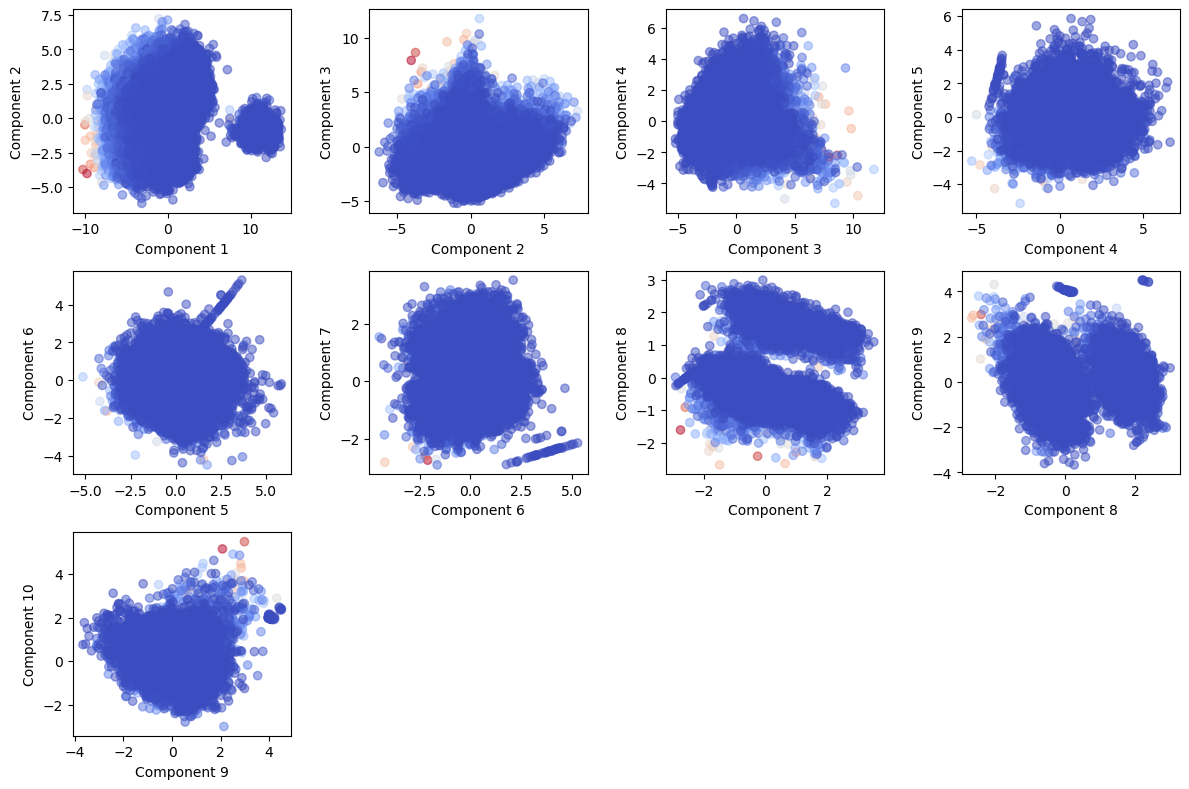

In [104]:
# Scatter plots of PCA components
plt.figure(figsize=(12, 8))
for i in range(n_components - 1):  # Adjusted the range to avoid out-of-bounds index
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_pca[:, i], X_pca[:, i + 1], c=y, cmap='coolwarm', alpha=0.5)
    plt.xlabel(f'Component {i + 1}')
    plt.ylabel(f'Component {i + 2}')
plt.tight_layout()
plt.show()

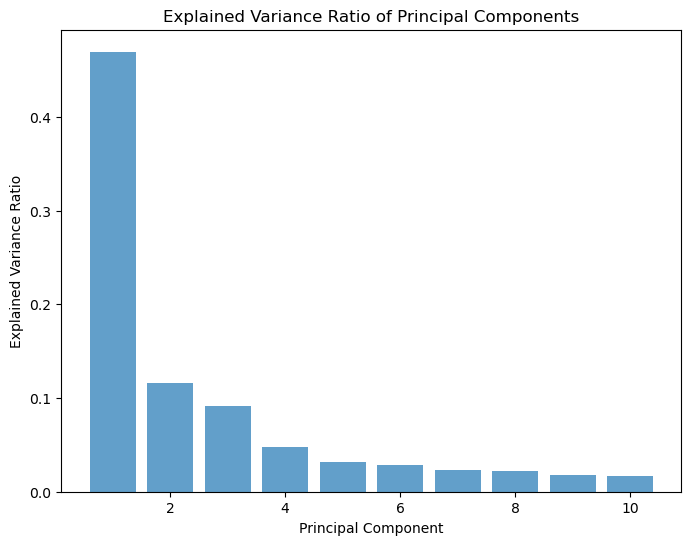

In [100]:
# Plot explained variance
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

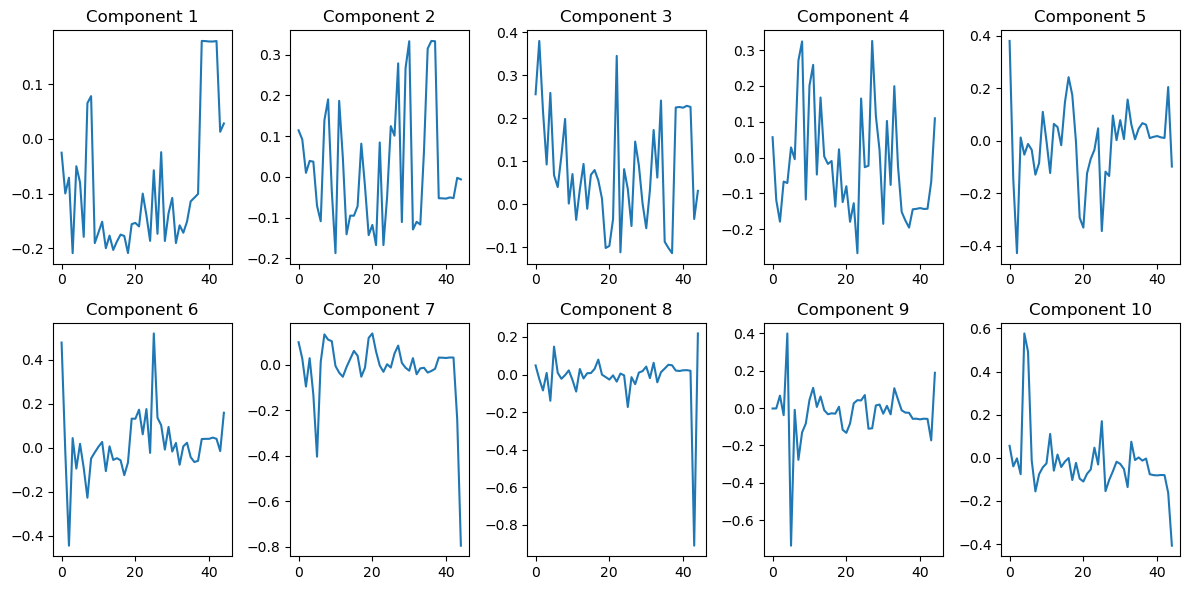

In [101]:
# Plot the first 10 PCA components
plt.figure(figsize=(12, 6))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.plot(pca.components_[i])
    plt.title(f'Component {i + 1}')
plt.tight_layout()
plt.show()

In [ ]:
# Modelling 

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [127]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Initialize and train XGBoost Regression model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [143]:
# Calculate adjusted R-squared
def adjusted_r_squared(r_squared, n_samples, n_features):
    return 1 - (1 - r_squared) * (n_samples - 1) / (n_samples - n_features - 1)

In [153]:
# Evaluate models using various metrics
def evaluate_model(y_true, y_pred, model_name, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r_squared(r2, len(y_true), n_features)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\nMetrics for {model_name}:--")
    print(f"\nMean Squared Error: {mse:.2f}, \nRoot Mean Squared Error: {rmse:.2f}, \nR-squared: {r2:.2f}, \nAdjusted R-squared: {adj_r2:.2f}, \nMean Absolute Error: {mae:.2f}")

In [154]:
# Number of features in X
n_features = X.shape[1]

# Evaluate Linear Regression model
evaluate_model(y_test, y_pred_lr, "Linear Regression", n_features)

# Evaluate Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest", n_features)

# Evaluate XGBoost model
evaluate_model(y_test, y_pred_xgb, "XGBoost", n_features)


Metrics for Linear Regression:--

Mean Squared Error: 13202157292303.50, 
Root Mean Squared Error: 3633477.30, 
R-squared: 0.56, 
Adjusted R-squared: 0.56, 
Mean Absolute Error: 1974465.13

Metrics for Random Forest:--

Mean Squared Error: 3133375787010.57, 
Root Mean Squared Error: 1770134.40, 
R-squared: 0.90, 
Adjusted R-squared: 0.89, 
Mean Absolute Error: 622104.68

Metrics for XGBoost:--

Mean Squared Error: 3083864717678.96, 
Root Mean Squared Error: 1756093.60, 
R-squared: 0.90, 
Adjusted R-squared: 0.90, 
Mean Absolute Error: 649302.95


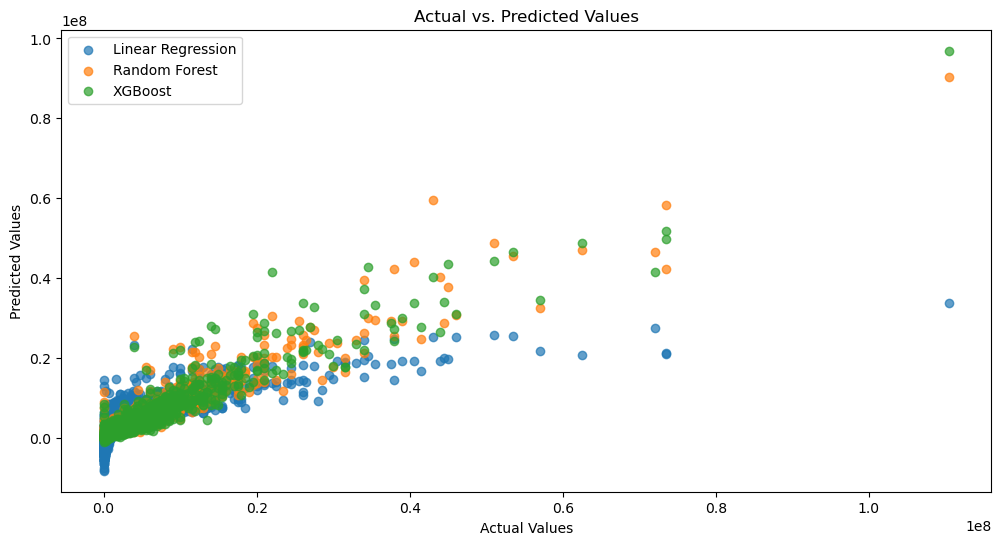

In [156]:
# Plot actual vs. predicted values for each model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.7)
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [ ]:
# *********************************END*********************************************

In [113]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, r2, adjusted_r2, mape

In [126]:
# Calculate metrics for each model
lr_metrics = calculate_metrics(y_test, y_pred_lr)
rf_metrics = calculate_metrics(y_test, y_pred_rf)
xgb_metrics = calculate_metrics(y_test, y_pred_xgb)

# Print metrics
print("Linear Regression Metrics:", lr_metrics)
print("\nRandom Forest Metrics:", rf_metrics)
print("\nXGBoost Metrics:", xgb_metrics)

Linear Regression Metrics: (13202157292303.504, 3633477.300369923, 0.5618449715780433, 0.5606382653582087, inf)

Random Forest Metrics: (3133375787010.5713, 1770134.398007838, 0.8960090895285232, 0.8957226920885026, inf)

XGBoost Metrics: (3083864717678.9565, 1756093.595933587, 0.8976522697686831, 0.8973703977493184, inf)


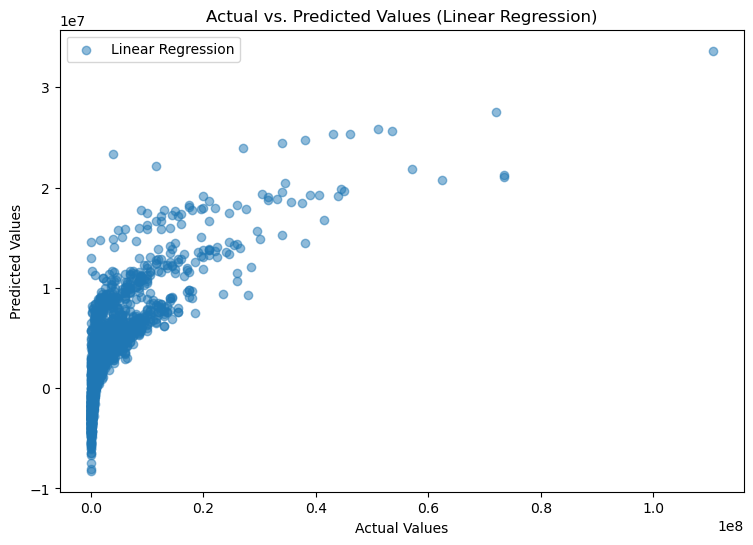

In [122]:
# Create line graphs for actual vs. predicted values
plt.figure(figsize=(30, 6))

# plot for Linear Regression model
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.legend()

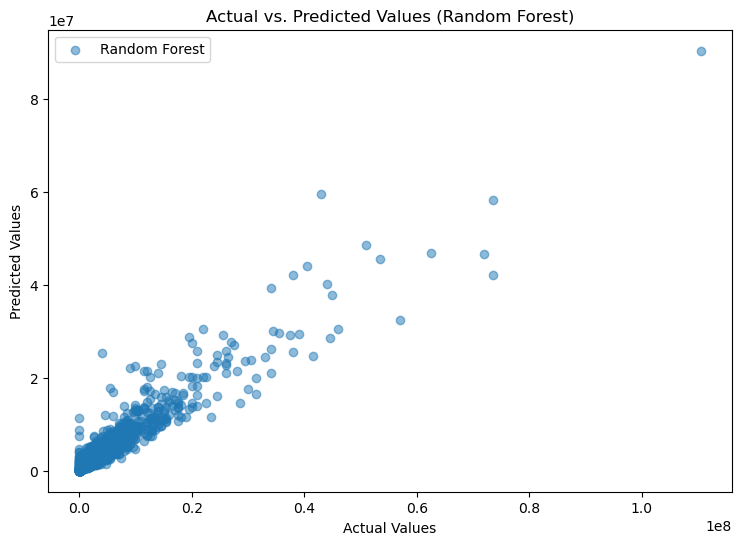

In [121]:
# Create line graphs for actual vs. predicted values
plt.figure(figsize=(30, 6))

# plot for Random Forest model
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.legend()

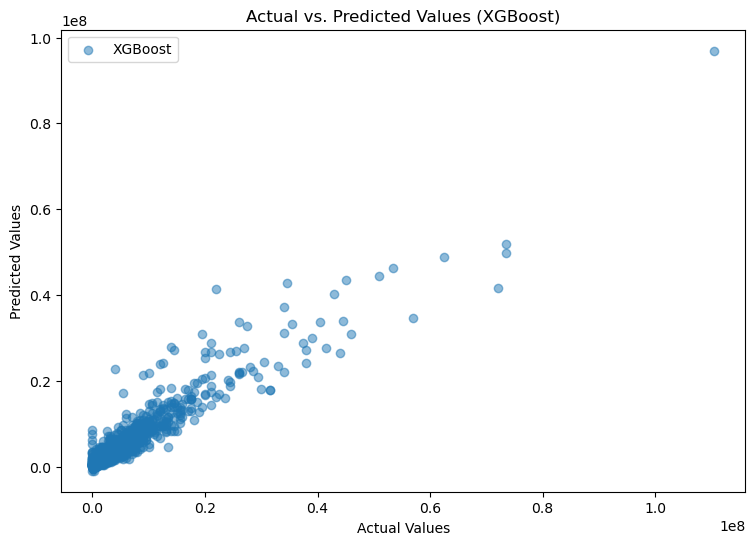

In [123]:
# Create line graphs for actual vs. predicted values
plt.figure(figsize=(30, 6))

# plot for XGBoost model
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (XGBoost)")
plt.legend()